<a href="https://colab.research.google.com/github/Monica-Restrepo/Desafio2-ciencia-de-datos/blob/main/desafio2_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# 📌  **Extracción**

##Cargue de datos

In [ ]:
#Vincular   BASE DE DATOS
import pandas as pd
url = 'https://raw.githubusercontent.com/Poderosodp/TelecomX_LATAM/main/TelecomX_Data.json'
df = pd.read_json(url)

##Revisión inicial

In [ ]:
df.head()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


(7267, 6)

# **🔧 Transformación**

##Normalizar columnas

In [ ]:
#Normalizar columnas
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

#Eliminar las columnas anidadas originales del DataFrame
df.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)

#Concatenar el DataFrame original con los nuevos datos normalizados
df = pd.concat([df, customer_df, phone_df, internet_df, account_df], axis=1)

#Verificar cambios
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##Ver nombres de las columnas

In [ ]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

##Renombrar las columnas y verificar

In [ ]:
df.rename(columns={
    'customerID': 'ID',
    'Churn':'cancelo',
    'gender': 'genero',
    'SeniorCitizen': 'mayor_de_65',
    'Partner': 'tiene_pareja',
    'Dependents': 'tiene_dependentes',
    'tenure': 'meses_de_contrato',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_en_linea',
    'OnlineBackup': 'Soporte_en_linea',
    'DeviceProtection': 'proteccion_dispositivos',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'servicio_tv',
    'StreamingMovies': 'servicio_peliculas',
    'PaperlessBilling': 'facturas_electronicas',
    'PaymentMethod': 'metodo_pago',
    'Contract': 'tipo_contrato',
    'Charges.Monthly': 'gastos_mensuales',
    'Charges.Total': 'gastos_totales'
}, inplace=True)

df.head()

,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,Soporte_en_linea,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##Detectar valores ausentes

In [ ]:
df.isnull().sum()

,0
ID,0
cancelo,0
genero,0
mayor_de_65,0
tiene_pareja,0
tiene_dependentes,0
meses_de_contrato,0
servicio_telefonico,0
lineas_multiples,0
servicio_internet,0


##Detectar Strings vacíos


In [ ]:
(df['cancelo'] == '').sum()
(df['gastos_totales'] == ' ').sum()

np.int64(11)

##Reemplazar los strings vacíos por NaN

In [ ]:
df['cancelo'] = df['cancelo'].replace('', np.nan)
df['gastos_totales'] = df['gastos_totales'].replace(' ', np.nan)

(df['cancelo'] == '').sum()
(df['gastos_totales'] == ' ').sum()

df.isnull().sum()

,0
ID,0
cancelo,224
genero,0
mayor_de_65,0
tiene_pareja,0
tiene_dependentes,0
meses_de_contrato,0
servicio_telefonico,0
lineas_multiples,0
servicio_internet,0


##Eliminar las filas con NaN

In [ ]:
df = df.dropna(subset=['cancelo', 'gastos_totales'])
df[['cancelo', 'gastos_totales']].isnull().sum()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       7032 non-null   object 
 1   cancelo                  7032 non-null   object 
 2   genero                   7032 non-null   object 
 3   mayor_de_65              7032 non-null   int64  
 4   tiene_pareja             7032 non-null   object 
 5   tiene_dependentes        7032 non-null   object 
 6   meses_de_contrato        7032 non-null   int64  
 7   servicio_telefonico      7032 non-null   object 
 8   lineas_multiples         7032 non-null   object 
 9   servicio_internet        7032 non-null   object 
 10  seguridad_en_linea       7032 non-null   object 
 11  Soporte_en_linea         7032 non-null   object 
 12  proteccion_dispositivos  7032 non-null   object 
 13  soporte_tecnico          7032 non-null   object 
 14  servicio_tv              7032

,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,Soporte_en_linea,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##Corregir tipos de datos

In [ ]:
# Convertir a float
df['gastos_totales'] = df['gastos_totales'].astype(np.float64)

# Convertir a str
vars_a_str = ['ID', 'genero', 'servicio_internet', 'tipo_contrato', 'metodo_pago']

# Convertirlas a string
df[vars_a_str] = df[vars_a_str].astype(str)

In [ ]:
# creo una variable que contiene todas las variables que van a ser transformadas en booleanos
columnas_bool = ['cancelo','mayor_de_65', 'tiene_pareja', 'tiene_dependentes', 'facturas_electronicas']
df[columnas_bool] = df[columnas_bool].replace({'Yes': True, 'No': False}).infer_objects(copy=False)

# Transformación de variables a categoricas
columnas_categoricas = ['lineas_multiples', 'seguridad_en_linea', 'Soporte_en_linea', 'proteccion_dispositivos', 'soporte_tecnico', 'servicio_tv', 'servicio_peliculas']
df[columnas_categoricas] = df[columnas_categoricas].astype('category')

df.head()

/tmp/ipython-input-3911017811.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columnas_bool] = df[columnas_bool].replace({'Yes': True, 'No': False}).infer_objects(copy=False)


,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,Soporte_en_linea,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales
0,0002-ORFBO,False,Female,0,True,True,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,False,Male,0,False,False,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,1,True,False,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40


##Verificar y Eliminar todos los duplicados

In [ ]:
df.duplicated().sum()

np.int64(0)

##Crear Columna de cuentas diarias

In [ ]:
df['cuentas_diarias'] = df['gastos_mensuales'].astype(float) / 30

df.head()

,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales,cuentas_diarias
0,0002-ORFBO,False,Female,0,True,True,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,0,False,False,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,1,True,False,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.796667


##Estandarización y transformación de datos

In [ ]:
df[columnas_bool] = df[columnas_bool].astype(int)
df[columnas_bool].head()
df.info()
df.head()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       7032 non-null   object  
 1   cancelo                  7032 non-null   int64   
 2   genero                   7032 non-null   object  
 3   mayor_de_65              7032 non-null   int64   
 4   tiene_pareja             7032 non-null   int64   
 5   tiene_dependentes        7032 non-null   int64   
 6   meses_de_contrato        7032 non-null   int64   
 7   servicio_telefonico      7032 non-null   object  
 8   lineas_multiples         7032 non-null   category
 9   servicio_internet        7032 non-null   object  
 10  seguridad_en_linea       7032 non-null   category
 11  Soporte_en_linea         7032 non-null   category
 12  proteccion_dispositivos  7032 non-null   category
 13  soporte_tecnico          7032 non-null   category
 14  servicio_tv  

,0
ID,object
cancelo,int64
genero,object
mayor_de_65,int64
tiene_pareja,int64
tiene_dependentes,int64
meses_de_contrato,int64
servicio_telefonico,object
lineas_multiples,category
servicio_internet,object


# **📊 Carga y análisis**

##Análisis Descriptivo

In [ ]:
df.describe()

,cancelo,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,facturas_electronicas,gastos_mensuales,gastos_totales,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,3.958333


##Recuento de evasión

In [ ]:
# identifica variables categoricas
columnas_categoricas = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
columnas_categoricas

# Realizar recuentos cruzados con cancelo
for col in columnas_categoricas:
    print(f'\n--- Porcentaje de evasión por {col} ---')
    porcentaje = pd.crosstab(df[col], df['cancelo'], normalize='index') * 100
    print(porcentaje.round(2))


--- Porcentaje de evasión por ID ---
cancelo         0      1
ID                      
0002-ORFBO  100.0    0.0
0003-MKNFE  100.0    0.0
0004-TLHLJ    0.0  100.0
0011-IGKFF    0.0  100.0
0013-EXCHZ    0.0  100.0
...           ...    ...
9987-LUTYD  100.0    0.0
9992-RRAMN    0.0  100.0
9992-UJOEL  100.0    0.0
9993-LHIEB  100.0    0.0
9995-HOTOH  100.0    0.0

[7032 rows x 2 columns]

--- Porcentaje de evasión por genero ---
cancelo      0      1
genero               
Female   73.04  26.96
Male     73.80  26.20

--- Porcentaje de evasión por servicio_telefonico ---
cancelo                  0      1
servicio_telefonico              
No                   75.00  25.00
Yes                  73.25  26.75

--- Porcentaje de evasión por lineas_multiples ---
cancelo               0      1
lineas_multiples              
No                74.92  25.08
No phone service  75.00  25.00
Yes               71.35  28.65

--- Porcentaje de evasión por servicio_internet ---
cancelo                0      1

##Distribución de evasión

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Definimos los colores
AZUL = '#1A4D71'         # azul corporativo más formal
VERDE = '#3A7A50'        # verde corporativo más formal
GRIS = '#333333'         # gris oscuro para títulos

In [ ]:
def cancelacion_tipo_internet():

  # Ordenar categorías según porcentaje de cancelación
  orden = df.groupby('servicio_internet')['cancelo'].mean().sort_values().index

  # Crear gráfica
  plt.figure(figsize=(10, 6))
  ax = sns.barplot(
      y='servicio_internet', # Cambiado a 'y'
      x='cancelo',     # Cambiado a 'x'
      data=df,
      estimator=lambda x: x.mean() * 100,
      order=orden,
      errorbar=None
  )

  # Asignar colores barra por barra (sin palette -> sin warning)
  for i, bar in enumerate(ax.patches):
      color = AZUL if i % 2 == 0 else VERDE
      bar.set_facecolor(color)

  # Añadir porcentaje sobre cada barra
  for container in ax.containers:
      ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3, color=AZUL, fontsize=12)

  # Personalización
  ax.set_title('Cancelación por tipo de Internet', fontsize=18, color=GRIS)

  # Eje X: suprimir ticks y etiqueta
  ax.set_xlabel('')
  ax.set_xticklabels([])  # oculta los valores del eje y
  ax.tick_params(axis='x', length=0)  # oculta las marcas de ticks del eje y


  # Eje Y: etiquetas en azul, tamaño 12
  ax.set_ylabel('') # Cambiado a ylabel
  ax.tick_params(axis='y', labelsize=12, colors=AZUL)

  # Eliminar bordes superior, derecho e izquierdo
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False) # Cambiado a bottom


  plt.tight_layout()
  return plt

In [ ]:
def cancelacion_tipo_contrato():

  # Ordenar categorías según porcentaje de cancelación
  orden = df.groupby('tipo_contrato')['cancelo'].mean().sort_values().index

  # Crear gráfica
  plt.figure(figsize=(10, 6))
  ax = sns.barplot(
      y='tipo_contrato',  # Cambiado a 'y'
      x='cancelo',      # Cambiado a 'x'
      data=df,
      estimator=lambda x: x.mean() * 100,
      order=orden,
      errorbar=None
  )

  # Asignar colores barra por barra (alternancia azul/verde)
  for i, bar in enumerate(ax.patches):
      color = AZUL if i % 2 == 0 else VERDE
      bar.set_facecolor(color)

  # Añadir porcentaje sobre cada barra
  for container in ax.containers:
      ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3, color=AZUL, fontsize=12)


  # Personalización
  ax.set_title('Cancelación por tipo de contrato', fontsize=18, color=GRIS)

  # Eje X: suprimir ticks y etiqueta
  ax.set_xlabel('')
  ax.set_xticklabels([])  # oculta los valores del eje y
  ax.tick_params(axis='x', length=0)  # oculta las marcas de ticks del eje y


  # Eje Y: etiquetas en azul, tamaño 12
  ax.set_ylabel('') # Cambiado a ylabel
  ax.tick_params(axis='y', labelsize=12, colors=AZUL)

  # Eliminar bordes superior, derecho e izquierdo
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False) # Cambiado a bottom

  # Fondo gris
  ax.set_facecolor('#f0f0f0')  # Fondo del gráfico
  plt.gcf().set_facecolor('#f0f0f0')  # Fondo de la figura completa


  plt.tight_layout()
  return plt

In [ ]:
def cancelacion_servicios_adicionales():

  # Lista de servicios adicionales
  servicios = ['seguridad_en_linea', 'Soporte_en_linea', 'proteccion_dispositivos', 'soporte_tecnico']
  titulos = ['Seguridad en línea', 'Soporte en línea', 'Protección de dispositivos', 'Soporte técnico']

  # Orden lógico de categorías
  orden = ['No', 'Yes', 'No internet service']

  # Crear figura y ejes
  fig, axs = plt.subplots(2, 2, figsize=(12, 8))
  fig.subplots_adjust(hspace=0.5, wspace=0.3)
  fig.suptitle('Cancelación según servicios adicionales', fontsize=20, color=GRIS)
  fig.patch.set_facecolor('#f0f0f0')  # fondo de la figura

  # Gráficas
  for i, (servicio, titulo) in enumerate(zip(servicios, titulos)):
      fila = i // 2
      col = i % 2
      ax = axs[fila, col]
      ax.set_facecolor('#f0f0f0')  # fondo del gráfico individual

      # Gráfica de barras sin usar hue
      plot = sns.barplot(
      x=servicio,
      y='cancelo',
      data=df,
      estimator=lambda x: x.mean() * 100,
      order=orden,
      errorbar=None,
      hue=servicio,           # agregamos hue (aunque no usaremos leyenda)
      legend=False,           # ocultamos leyenda
      ax=ax,
      palette=[AZUL, VERDE, AZUL]
  )

      # Título
      ax.set_title(titulo, fontsize=16, color=GRIS)

      # Etiqueta del eje Y solo en la primera columna
      if col == 0:
          ax.set_ylabel('')
          ax.set_yticklabels([])  # suprimir etiquetas y
          ax.tick_params(axis='y', length=0)  # sin ticks eje y
      else:
          ax.set_ylabel('')
          ax.set_yticklabels([])
          ax.tick_params(axis='y', length=0)

      # Eje X
      ax.set_xlabel('')
      ax.tick_params(axis='x', labelsize=12, colors=AZUL)

      # Bordes
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
      ax.spines['left'].set_visible(False)

      # Rango común para comparar
      ax.set_ylim(0, 50)

      # Etiquetas sobre las barras
      for container in ax.containers:
          ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3, color=AZUL, fontsize=12)

  plt.tight_layout(rect=[0, 0, 1, 0.95])  # para que el título no se encime
  return plt

In [ ]:
# Realizar recuentos cruzados con cancelo
variables_binarias = ['mayor_de_65', 'tiene_pareja', 'tiene_dependentes']

for col in variables_binarias:
    print(f'\n--- Porcentaje de evasión por {col} ---')
    porcentaje = pd.crosstab(df[col], df['cancelo'], normalize='index') * 100
    print(porcentaje.round(2))


--- Porcentaje de evasión por mayor_de_65 ---
cancelo          0      1
mayor_de_65              
0            76.35  23.65
1            58.32  41.68

--- Porcentaje de evasión por tiene_pareja ---
cancelo           0      1
tiene_pareja              
0             67.02  32.98
1             80.28  19.72

--- Porcentaje de evasión por tiene_dependentes ---
cancelo                0      1
tiene_dependentes              
0                  68.72  31.28
1                  84.47  15.53


In [ ]:
def cancelacion_bin():

  plt.figure(figsize=(14, 4))

  for i, var in enumerate(variables_binarias):
      plt.subplot(1, 4, i+1)

      # Calcular porcentaje de cancelación
      data = df.groupby(var)['cancelo'].mean() * 100
      categorias = data.index
      valores = data.values

      # Convertimos a DataFrame para usar x=hue
      temp_df = pd.DataFrame({var: categorias, 'cancelacion': valores})

      # Gráfico de barras con colores alternos
      sns.barplot(
          data=temp_df,
          x=var,
          y='cancelacion',
          hue=var,
          palette=[AZUL, VERDE],
          legend=False
      )

      # Texto sobre las barras
      for j, v in enumerate(valores):
          plt.text(j, v + 2, f'{v:.1f}%', ha='center', fontsize=12, color=AZUL)

      # Limites y personalización
      plt.ylim(0, 100)
      plt.title(var.replace('_', ' ').capitalize(), fontsize=16, )

      # Eje Y sin etiquetas ni ylabel
      plt.tick_params(axis='y', labelleft=False)
      plt.ylabel('')

      # Eje X personalizado
      plt.xlabel('')
      plt.xticks([0, 1], ['No', 'Sí'], fontsize=12, color=AZUL)

      # Eliminar bordes superior, derecho e izquierdo
      ax = plt.gca()
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
      ax.spines['left'].set_visible(False)

  plt.tight_layout()
  return plt

##Conteo de evasión por variables numéricas

In [ ]:
# Variables numericas
columnas_numericas = [['gastos_mensuales','gastos_totales','cuentas_diarias']]

# Promedios y desviaciones por grupo
df.groupby('cancelo')[['gastos_mensuales', 'gastos_totales', 'cuentas_diarias']].agg(['mean', 'std'])

print(columnas_numericas)
print(type(columnas_numericas))

columnas_numericas = columnas_numericas[0]

[['gastos_mensuales', 'gastos_totales', 'cuentas_diarias']]
<class 'list'>


In [ ]:
def boxplot_cancelacion(columnas_numericas):

  plt.figure(figsize=(15, 5))
  plt.gcf().set_facecolor('#F2F2F2')  # Fondo claro

  for i, col in enumerate(columnas_numericas):
      plt.subplot(1, 3, i + 1)

      # Boxplot con alternancia de colores
      sns.boxplot(
      x='cancelo',
      y=col,
      hue='cancelo',
      data=df,
      showfliers=False,
      palette=[AZUL, VERDE],
      legend=False
     )

      # Título en GRIS
      plt.title(f'{col.replace("_", " ").capitalize()} según cancelación', fontsize=16, color=GRIS)

      # Eje X
      plt.xlabel('Canceló', fontsize=12, color=AZUL)
      plt.xticks([0, 1], ['No', 'Sí'], fontsize=12, color=AZUL)

      # Eje Y
      plt.ylabel(col.replace('_', ' ').capitalize(), fontsize=12, color=AZUL)
      plt.tick_params(axis='y', labelsize=12, colors=AZUL)

      # Eliminar bordes superior, derecho e izquierdo
      ax = plt.gca()
      ax.set_facecolor('#F2F2F2')  # Fondo claro en subplot
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
      ax.spines['left'].set_visible(False)

  plt.tight_layout()
  return plt

In [ ]:
def cancelacion_segun_meses():

  # Violin plot para meses de contrato
  plt.figure(figsize=(10, 5))
  sns.boxplot(x='cancelo', y='meses_de_contrato', data=df, showfliers=False, palette=[AZUL, VERDE], hue='cancelo', legend=False)
  plt.title('Meses de contrato según cancelación', fontsize=18, color=GRIS)
  plt.xlabel('Canceló', fontsize=12, color=AZUL)
  plt.xticks([0, 1], ['No', 'Sí'], fontsize=12, color=AZUL)
  plt.ylabel('Meses de contrato', fontsize=12, color=AZUL)

  # Eliminar bordes superior, derecho e izquierdo
  ax = plt.gca()
  ax.set_facecolor('#F2F2F2')  # Fondo claro en subplot
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)


  plt.tight_layout()
  return plt

# **📄Informe final**

## 🔹 Introducción:

El objetivo de este análisis es ayudar a la empresa Telecom X a identificar factores que están llevando a la cancelación de sus servicios, para que el equipo de Data Science pueda avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

## 🔹 Limpieza y Tratamiento de Datos:

Se toma la base de datos incial para su respectivo analisís, donde se realiza el proceso de estructuración, estandarización y limpieza de datos; esto con el fin de poder unificar la información para su respectiva revisión.

## 🔹 Análisis Exploratorio de Datos:


---

# 📊 Informe Ejecutivo de Cancelación de Clientes  
**Análisis de Comportamiento y Recomendaciones Estratégicas**

## 1. Resumen Ejecutivo  
Este informe presenta un análisis detallado de los factores asociados a la cancelación de servicios por parte de los clientes. A partir de los datos observados, se identifican patrones de evasión relevantes y se proponen acciones estratégicas para mejorar la retención y fidelización.

---

## 2. Principales Hallazgos  

### 🔹 Perfil de Cancelación

- **Fibra óptica con mayor tasa de cancelación (41.9%)**  
  Los clientes con este tipo de conexión presentan una mayor propensión a cancelar, lo que sugiere posibles deficiencias técnicas o de percepción del servicio.

- **Contratos mensuales menos estables (42.7%)**  
  Los usuarios con contratos de corto plazo muestran menor compromiso, lo que se traduce en una tasa de cancelación significativamente más alta.

- **Falta de servicios adicionales reduce la fidelización**  
  La ausencia de servicios como seguridad en línea, soporte técnico o protección de dispositivos se asocia con tasas de cancelación superiores al 39%.

- **Clientes mayores de 65 años: tasa de cancelación del 41.7%**  
  Este segmento presenta una mayor vulnerabilidad a la evasión, posiblemente por falta de adecuación del servicio a sus necesidades.

- **Estado civil y carga familiar influyen en la permanencia**  
  Clientes sin pareja (33%) y sin dependientes (31.3%) cancelan con mayor frecuencia, lo que sugiere menor arraigo o menor percepción de valor compartido.

- **Mayor gasto mensual correlaciona con mayor cancelación**  
  A medida que se incrementa el gasto, también lo hace la tasa de evasión, lo que podría reflejar una percepción negativa sobre la relación costo-beneficio.

- **Clientes nuevos cancelan más**  
  El bajo total facturado entre quienes cancelan indica que muchos abandonan el servicio en etapas tempranas, posiblemente durante el periodo de prueba.

- **Mayor uso no implica mayor fidelidad**  
  Aunque los clientes cancelantes presentan más conexiones diarias, esto no se traduce en mayor permanencia, lo que podría evidenciar insatisfacción pese al uso activo.

- **Contratos cortos = menor retención**  
  La mediana de duración contractual entre cancelantes es de aproximadamente 10 meses, lo que refuerza la necesidad de estrategias de compromiso a largo plazo.

---

## 3. Recomendaciones Estratégicas  

### 🛠️ Acciones para Reducir la Evasión

1. **Optimización del servicio de fibra óptica**  
   - Realizar auditorías técnicas en zonas con alta cancelación.  
   - Ofrecer alternativas de conectividad en áreas críticas.

2. **Fomento de contratos a largo plazo**  
   - Implementar incentivos como descuentos progresivos o beneficios exclusivos.  
   - Evitar cláusulas restrictivas que generen rechazo.

3. **Paquetes integrales sin recargo adicional**  
   - Incluir servicios de soporte, seguridad y protección en la oferta base.  
   - Comunicar claramente el valor agregado sin aumento en la factura.

4. **Segmentación para adultos mayores**  
   - Diseñar planes con contenidos adaptados a sus intereses.  
   - Ofrecer atención personalizada y canales de comunicación accesibles.

5. **Promociones para clientes sin pareja o dependientes**  
   - Crear campañas específicas con beneficios exclusivos.  
   - Reforzar el valor individual del servicio.

6. **Revisión de estructura tarifaria**  
   - Evaluar opciones de pago flexibles (quincenal, prepago).  
   - Ajustar precios en función del uso y percepción de valor.

---

## 4. Conclusión  
La cancelación de servicios responde a múltiples factores que van desde el tipo de contrato hasta características demográficas y percepciones de valor. La implementación de estrategias segmentadas, junto con mejoras en la oferta técnica y comercial, permitirá reducir la evasión y fortalecer la fidelización del cliente.

## 🔹 Recomendaciones:

Con base en los hallazgos obtenidos, se proponen las siguientes estrategias para reducir la tasa de cancelación y aumentar la fidelización de clientes:

1. Optimizar la experiencia de nuevos clientes:

Desarrollar un programa de bienvenida que acompañe a los nuevos usuarios durante los primeros meses.

Realizar encuestas de satisfacción temprana para detectar problemas a tiempo y evitar cancelaciones tempranas.

2. Mejorar la percepción de valor del servicio:

Reestructurar los paquetes para incluir servicios adicionales sin aumentar el precio final.

Comunicar de forma más clara los beneficios incluidos en el servicio (soporte, seguridad, protección).

Implementar opciones de pago más flexibles (ej. pagos quincenales o personalizados) para clientes con alto gasto mensual.

3. Fidelizar a los clientes con contratos mes a mes:

Ofrecer incentivos exclusivos para quienes migren de contrato mensual a uno de mayor duración (como beneficios permanentes o tarifas especiales).

Crear un sistema de recompensas o puntos por antigüedad, aplicable incluso en contratos mensuales.

4. Segmentar ofertas según el perfil del cliente:

Para adultos mayores: ofrecer contenido personalizado, soporte preferencial, atención al cliente dedicada y capacitación básica para el uso del servicio.

Para personas solteras o sin dependientes: crear campañas enfocadas en independencia, flexibilidad y autosuficiencia, con promociones diseñadas para su estilo de vida.

5. Auditar y mejorar el servicio de fibra óptica:

Analizar reclamos técnicos y evaluar la infraestructura por zonas geográficas.

Priorizar mejoras en las áreas con mayores tasas de cancelación asociadas a fibra óptica.

Capacitar al personal técnico para garantizar instalaciones sin inconvenientes.

6. Monitorear la actividad del usuario:

Identificar patrones de uso que preceden a la cancelación (como reducción en conexiones diarias).

Usar esta información para activar alertas preventivas o campañas personalizadas de retención.

7. Crear una unidad de análisis de cancelaciones:

Implementar un sistema continuo de análisis de evasión para identificar nuevas tendencias.

Hacer seguimiento mensual de métricas clave (edad, tipo de contrato, servicios adicionales, antigüedad, etc.).

## 🔹Gracficos

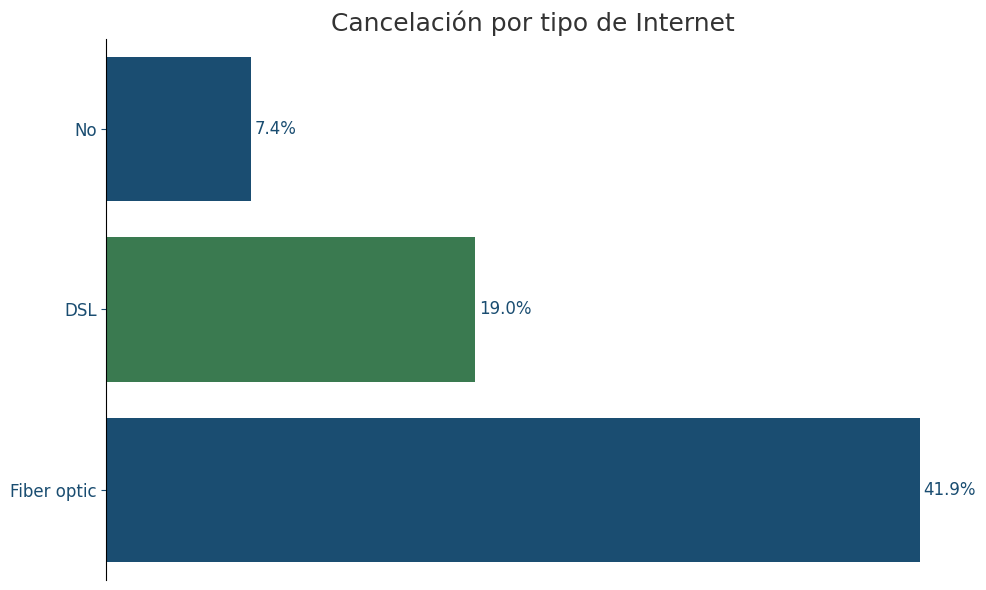

In [ ]:
cancelacion_tipo_internet().show()

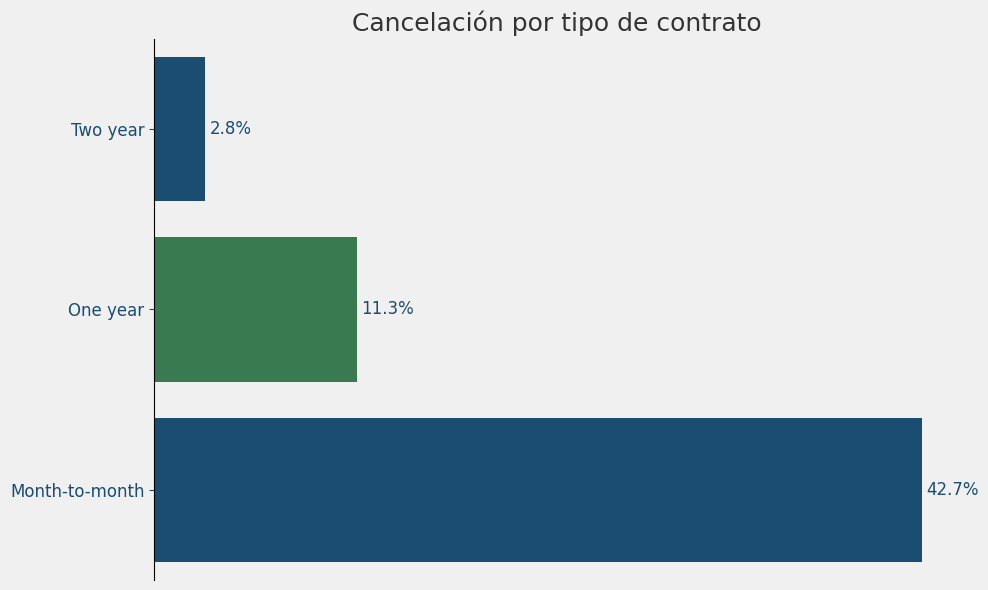

In [ ]:
cancelacion_tipo_contrato().show()

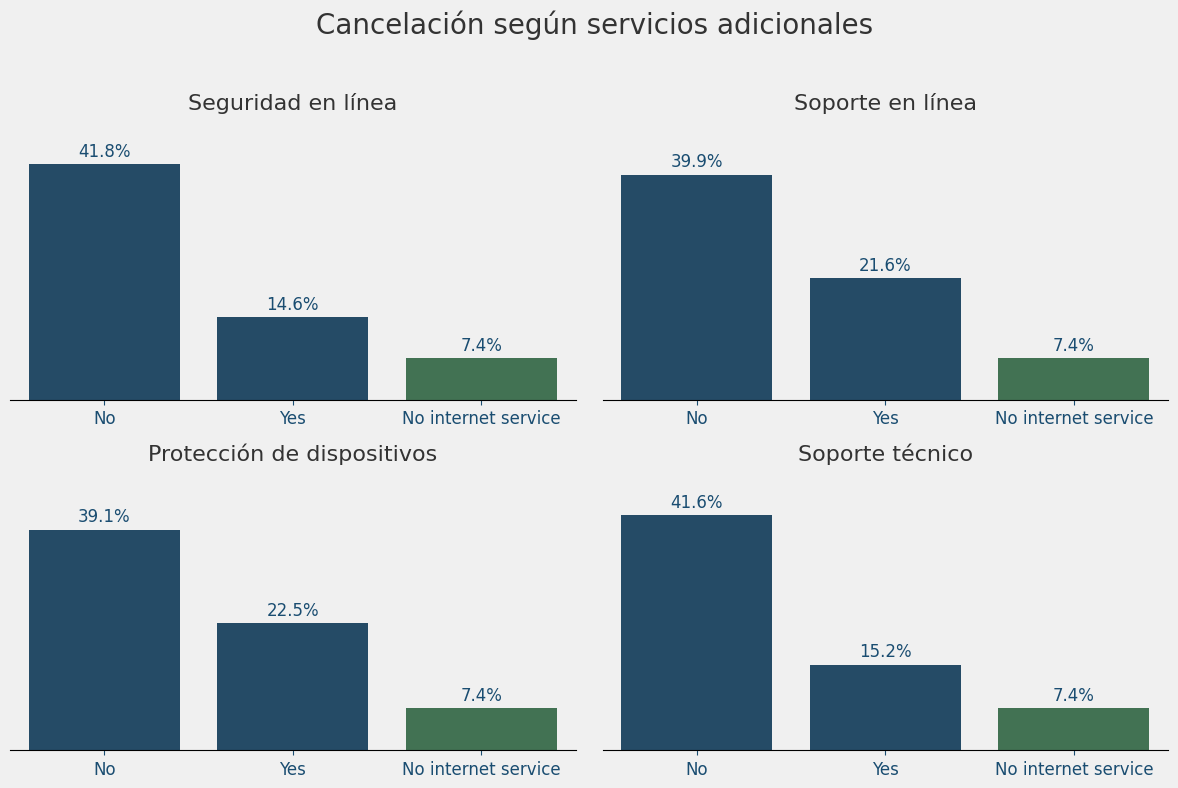

In [ ]:
cancelacion_servicios_adicionales().show()

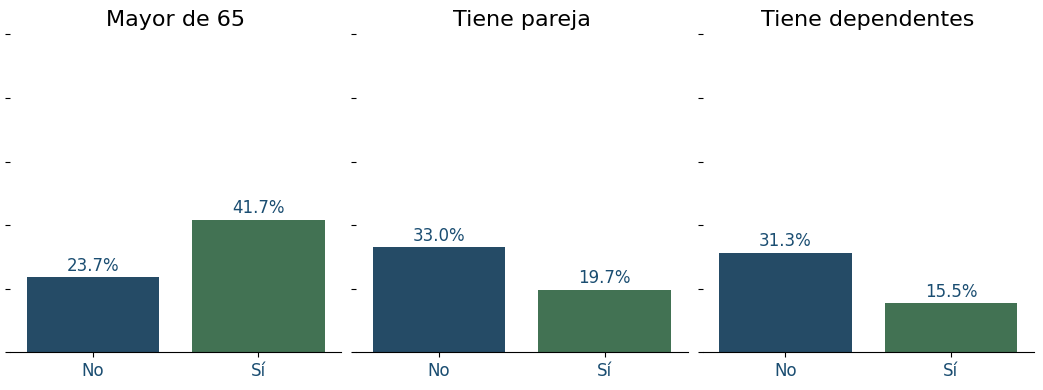

In [ ]:
cancelacion_bin().show()

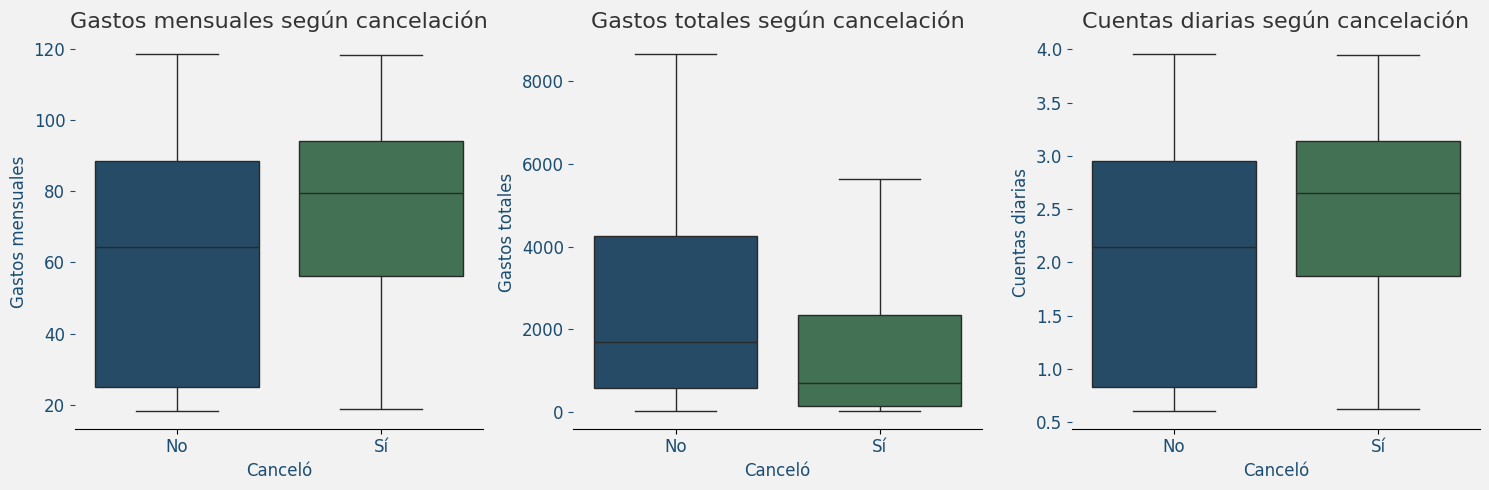

In [ ]:
boxplot_cancelacion(columnas_numericas).show()

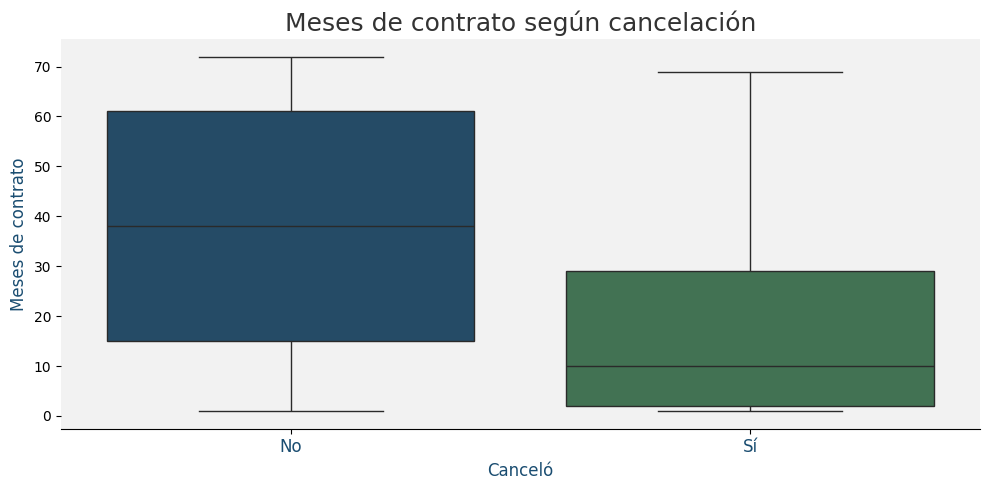

In [ ]:
cancelacion_segun_meses().show()

In [73]:
from google.colab import files

files.download("datos_tratados.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>